# Lead Score - Case Study with Logistic Regression

## Problem Statement

X Education sells online courses to industry professionals. They need help in selecting the most promising leads, i.e. the ‘leads’ that are most likely to convert into paying customers.

Customers are called as ‘leads’ when they provide their contact details to the company  through various channels.
The Sales team of the company follows up with these Leads to sell them the course and convert into paying customers.

The conversion to lead ratio is currently 30%. The company wants to improve this ratio by identifying the most potential leads, also known as ‘Hot Leads’.



**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**


## Goal
There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. 




## Steps to be followed:
- Importing Data

- Inspecting the Datafram

- Data Preparation (Encoding Categorical Variables, Handling Null Values)
  
- EDA (univariate analysis, outlier detection, checking data imbalance)

- Dummy Variable Creation

- Test-Train Split

- Feature Scaling
  
- Looking at Correlations

- Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-values)

- Build final model

- Model evaluation with different metrics Sensitivity, Specificity

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## 1: Importing Data

In [2]:
# Importing lead dataset
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2: Inspecting the Dataframe

In [3]:
# checking the shape of the data 
lead_df.shape

(9240, 37)

There are 9240 rows and 37 columns in the Leads dataset.

In [4]:
# checking non null count and datatype of the variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are missing values present in our data by observing the non-null counts.

In [5]:
# Statistical summary of numerical data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 3. Data Cleaning

In [6]:
# Checking the columns for null values
lead_df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As we can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9240 datapoints in our dataframe, let's eliminate the columns having greater than 3200(~35%) missing values as they are of no use to us.

In [7]:
# Checking the columns for null values percentage :
(round(lead_df.isnull().sum()/len(lead_df.index),2)*100).sort_values(ascending=False)

Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
Tags                                             36.0
What is your current occupation                  29.0
Lead Profile                                     29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content   

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 35%.
Columns with a high percentage of missing data can introduce noise and reduce the reliability of the analysis. Retaining such columns may lead to biased or inaccurate results.

In [8]:
# Dropping all the columns in which greater than 35% of missing values are present

columns_to_drop= lead_df.columns[round(lead_df.isnull().sum()/lead_df.shape[0]*100,2) > 35]

lead = lead_df.drop(columns=columns_to_drop)

In [9]:
# Verifying the null percentages across columns after dropping the above columns
(round(lead.isnull().sum()/len(lead.index),2)*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Lead Profile                                     29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
X Education Forums                                0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                   

There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [10]:
# Checking the labels of the  columns

for col in lead.iloc[:,1:].columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead[col].value_counts())
    print("_________________________________________________________________________________________________")

Lead Number
_________________________________________________________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
_________________________________________________________________________________________________
Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154


The following 4 columns have level : 'Select'.

Specialization: Select 1942

How did you hear about X Education: Select 5043

Lead Profile: Select 4146

City: Select 2249

Let's check the value counts here for these 4 columns:

In [11]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [12]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [13]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [14]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Clearly the columns Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

Also City has mostly Mumbai and Select as values, if we replace Select with Mumbai or Unknown still it will be skewed. Hence dropping this column as well 

In [15]:
# dropping Lead Profile , City and How did you hear about X Education columns

lead=lead.drop(columns=['Lead Profile', 'How did you hear about X Education', 'City'])

In [16]:
# Checking the columns for null values
lead.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article           

### 4. Missing Value Handling

#### Below listed columns have huge null values which needs to be handled:

Lets use countplot to visualize these columns:

In [17]:
def cnt_plot(col):
    plt.figure(figsize=(5,6))
    sns.countplot(lead[col])
    plt.xticks(rotation = 90)
    plt.show()

1) What matters most to you in choosing a course  has  29% missing values

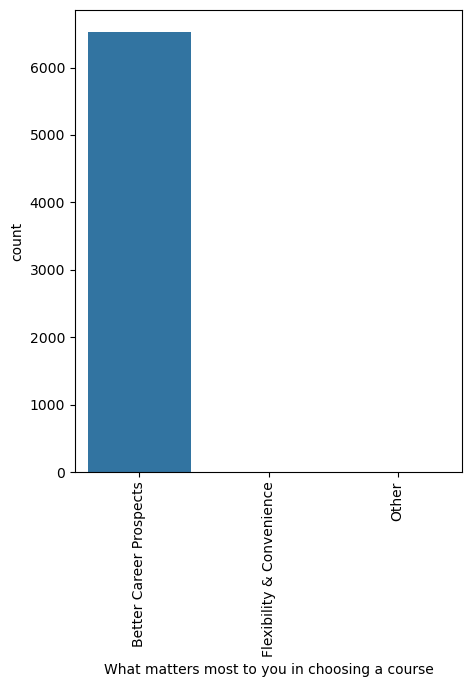

In [18]:
cnt_plot('What matters most to you in choosing a course')

We can see that this is highly skewed column we can drop this column.

In [19]:
lead=lead.drop('What matters most to you in choosing a course',axis=1)

2. 'What is your current occupation' column has 29% missing values.

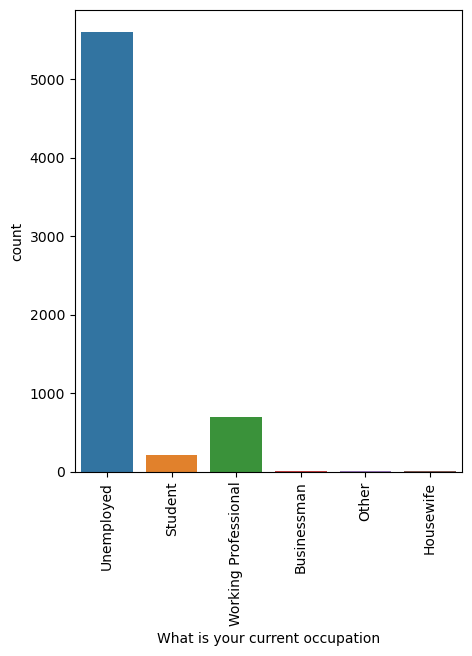

In [20]:
# Visualizing 'What is your current occupation' column :
cnt_plot('What is your current occupation')

In [21]:
# Lets check the percentage of the different categories of this column:

round(lead['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

85% of the values under this column is 'Unemployed', hence we can impute missing values in this column with this value

In [22]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'

lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

3) 'Country' column has 27% missing values

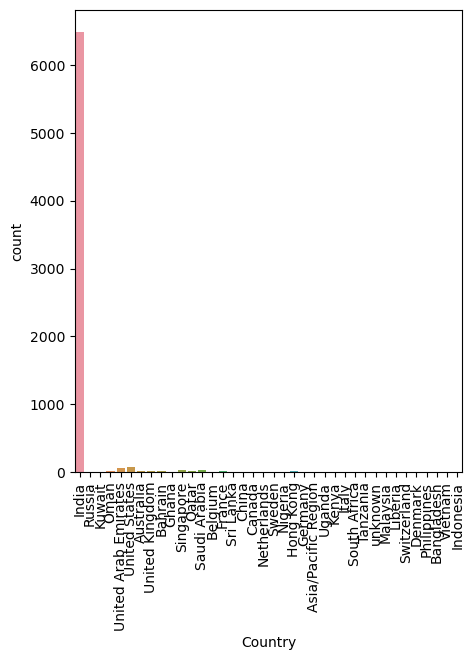

In [23]:
# Visualizing 'Country' column :
cnt_plot('Country')

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [24]:
# Imputing the missing data in the 'Country' column with 'India'
lead['Country']=lead['Country'].replace(np.nan,'India')

2. 'Specialization' has 37% missing values

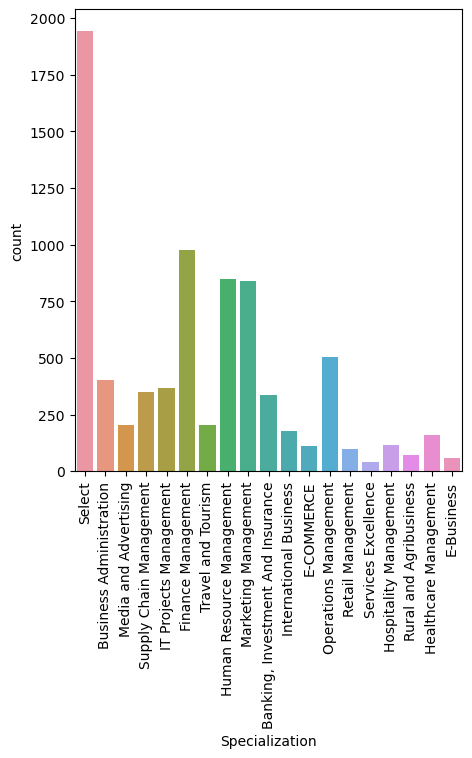

In [25]:
# Visualizing 'Specialization' column :
plt.figure(figsize=(5,6))
sns.countplot(lead['Specialization'])
plt.xticks(rotation = 90)
plt.show()

Lets replace the 37% missing values with another category.

In [26]:
# Lets replace with 'Select' since that is also a missing value in this column
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Select')

4. 'What matters most to you in choosing a course' column has 29% missing values

In [27]:
# Checking the columns for null values
lead.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
Newspaper Article                             0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
X Education Forums                            0
What is your current occupation               0
Magazine                                      0
Search                                        0
Lead Number                                   0
Specialization                                0
Country                                 

In [28]:
# Dropping the rows with null values

lead.dropna(inplace = True)

In [29]:
# Finding the null percentages across columns after removing the above columns

round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

All the missing values are handled and no more missing values are to be found in the data

### 4: Checking for duplicates

In [30]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


From the above we can say that there are no duplicate records in the dataset

## 5: Exploratory Data Anaysis


Let us try and understand the data now based on each columns effect on the conversion rates

### 5.1 Univariate Analysis and Bivariate Analysis

1) Converted

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [31]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

In [32]:
# Lets check if we have any data imbalance in the target variable
lead["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

We have good representation of both the classes of data and hence we are good to go with the further analysis

In [33]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

Defining a function for visualizing Lead Conversion wrt all the categories in the dataset using countplot.

PS: We will use boxplot for visualizing the numerical variables.

In [34]:
def cntplt(col):
    sns.countplot(x = col, hue = "Converted", data = lead,palette='gist_rainbow_r')
    plt.xticks(rotation = 90)
    plt.show()

Visualizing the features one by one wrt target variable 'Converted'

2. Lead Origin

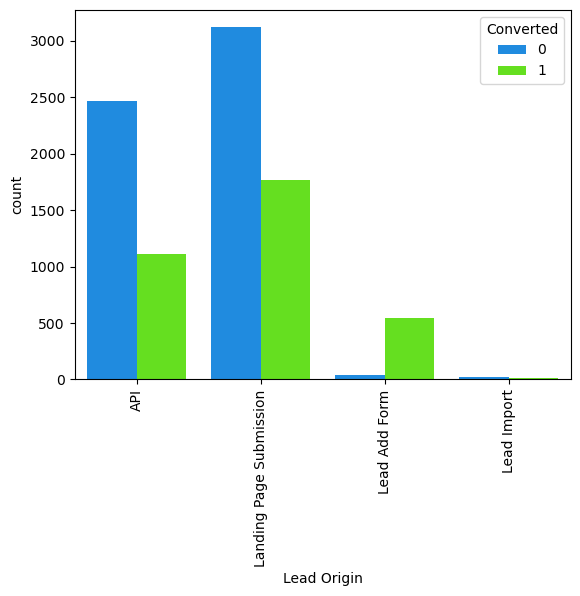

In [35]:
cntplt("Lead Origin")

### Inference :

- We can see that we have majority of the leads in API and Landing Page Submission categories, around 30%  of the leads have converted which is less,    however, since the count of leads is in good numbers we can focus on these categories to improvise the lead conversion rate.

- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high, we need to focus on this category as well. 


- Lead Import are very less in count and also the conversion rate is too low, we can disregard this category.


We can say that , to improvise the lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

3) Lead Source 

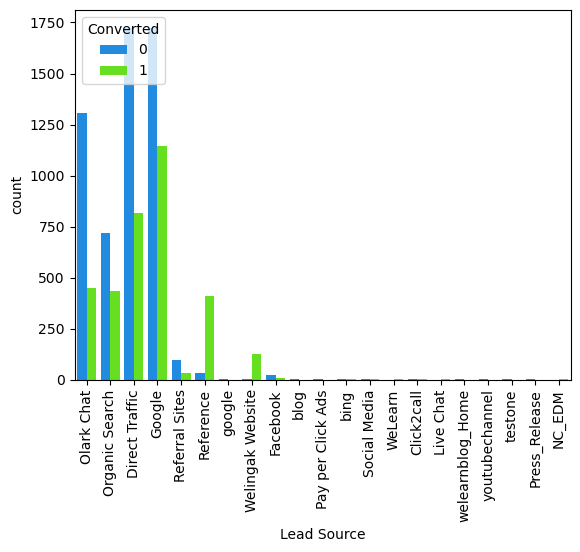

In [36]:
# Visualizing Lead Comversion wrt 'LeadSource'

cntplt("Lead Source")

We can observe that google is spelled as 'Google' and 'google' with g in uppercase and another having lowercase. We can rename the category for better analysis.

In [37]:
# Need to replace 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [38]:
# Clubbing All the categories which doesn't have much values as 'Others'

lead['Lead Source'] = lead['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing','Social Media','WeLearn','Click2call','Live Chat',
                                                   'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

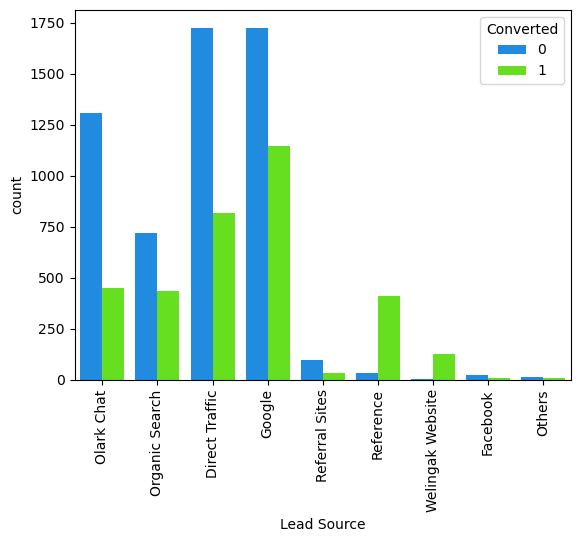

In [39]:
#Visualizing 'Lead Source' after the above mentioned changes:

cntplt("Lead Source")

### Inference:

- Maximum number of leads are generated from 'Google' and 'Direct traffic'.


- Conversion Rate of  leads through 'reference' and 'welingak website' is high.


To improve overall lead conversion rate, focus should be on improving lead converion of 'olark chat', 'organic search', 'direct traffic', and 'google' leads and generate more leads from 'reference' and 'welingak website'.
 sent

4) Do not Email

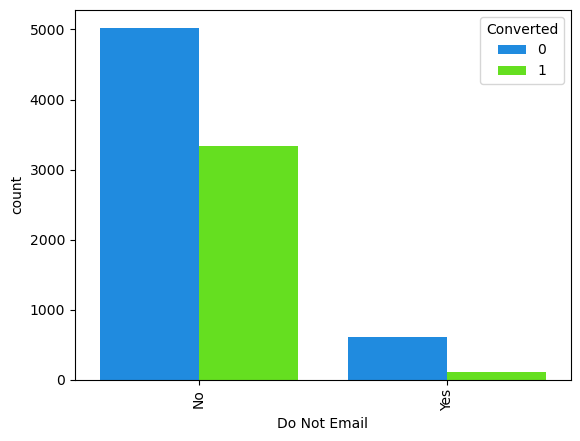

In [40]:
cntplt("Do Not Email")

### Inference:
Majority of the customers opted in for receiving emails. Around 60% of the customers who didnt opt out of receiving emails got converted. 

5. Do Not Call

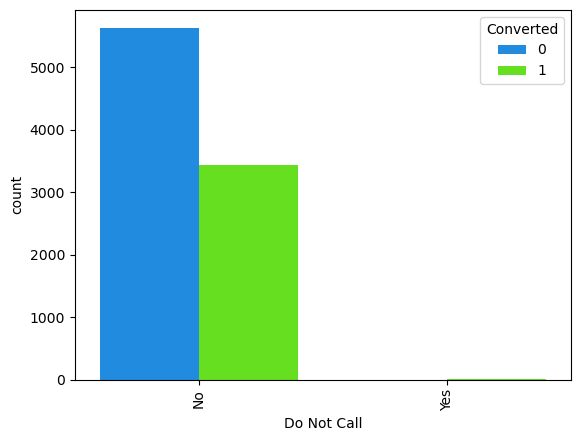

In [41]:
cntplt("Do Not Call")

### Inference:
'No' is dominating the Do Not Call" parameter. No Inference can be drawn with this parameter.

6) Total Visits

In [42]:
lead['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='TotalVisits'>

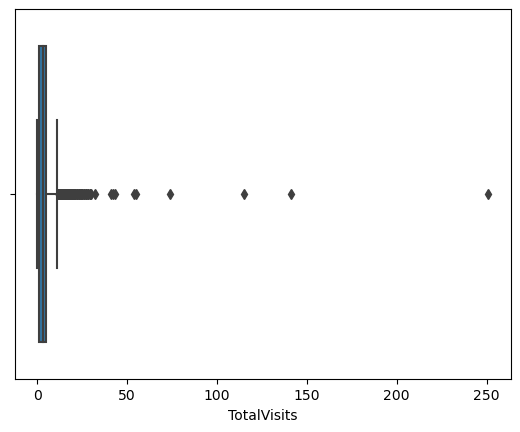

In [43]:
sns.boxplot(lead['TotalVisits'])

We can observe that there are outliers in 'TotalVisits'. 

In [44]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
lead['TotalVisits'].value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

We see there are outliers however there are customers who are frequently visiting the website, so we need not cap the outliers as this can be important for our analysis. We let this column be as it is.

Also we see that the number of data points( 141, 115, 251)  are very minimal number of outliers.

The issue comes when there is a significant number of data points classified as outliers.

<Axes: xlabel='Converted', ylabel='TotalVisits'>

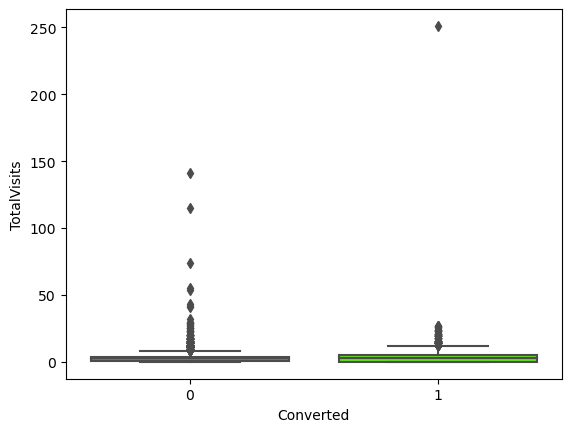

In [46]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead,palette='gist_rainbow_r')

### Inference
We can see that the values for Converted and Not Converted leads are almost the same. We cannot infer anything in particular from "Total Visits" data.

7) Total Time Spent on Website

In [47]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [48]:
lead['Total Time Spent on Website'].value_counts()

0       2165
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

We see there are outliers however there are customers who are spending lot of time browsing the website, so we need not cap the outliers as this can be important for our analysis. We let this column be as it is.

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

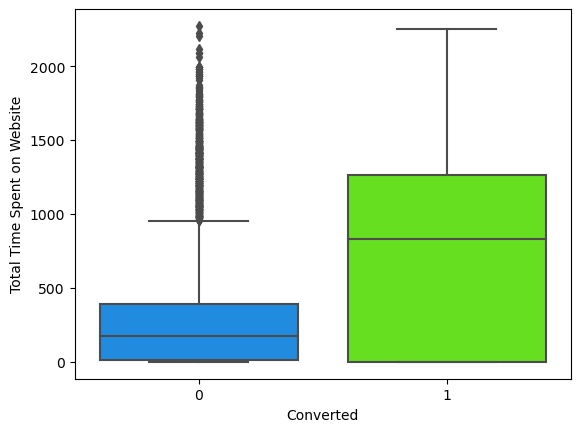

In [49]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette='gist_rainbow_r')

### Inference
- We can see higher rate of conversion for leads who are spending more time exploring the website. 

Focus can be made on enhancing the customer experience on website,in turn increasing the time customer spends on the websites, resulting in increasing the conversion rates.

8) Page Views Per Visit

In [50]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [51]:
lead['Page Views Per Visit'].value_counts()

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

<Axes: xlabel='Page Views Per Visit'>

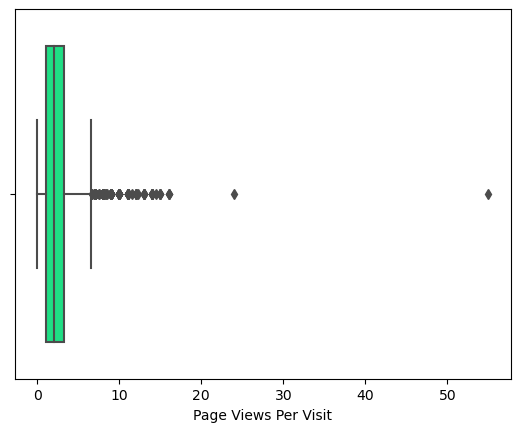

In [52]:
sns.boxplot(lead['Page Views Per Visit'],palette='gist_rainbow_r')

We can clearly see there are outliers, however, there are customers who are spending lot of time browsing through the website and it shows there keen interest in the website , and can be important leads. Hence will keep this column as it is.

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

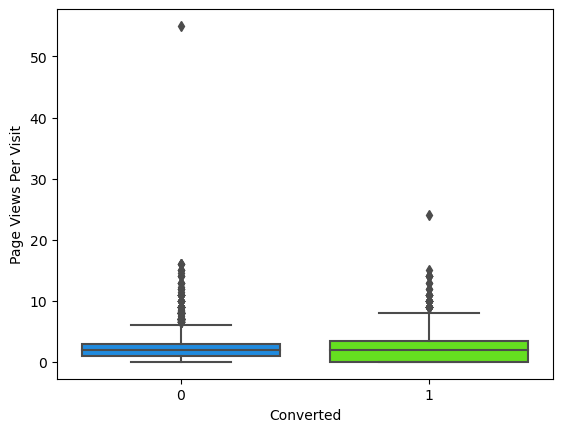

In [53]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead,palette='gist_rainbow_r')

### Inference
We can see that the median for Converted and Not Converted leads are the same. We cannot infer anything in particuar from the Average number of pages on the website viewed during the visits.

9) Last Activity

In [54]:
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

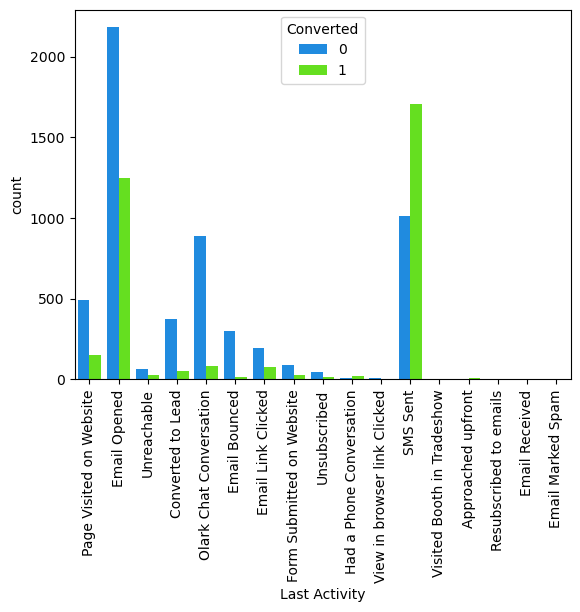

In [55]:
cntplt("Last Activity")

From the about plot we can observe that , 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam' have very less data compared to other categories, so these categories can be clubbed into "Others" 

In [56]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 
                                                       'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

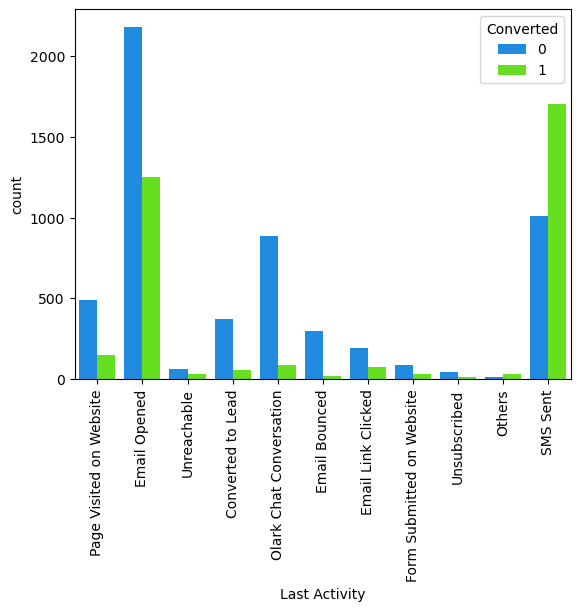

In [57]:
# Visualizing again
cntplt("Last Activity")

### Inference
- 'Email Opened' is the last activity for most of the leads. 

- Coming to the high conversion rates, we can see that 'SMS Sent' as the last activity has the highest conversion rates.

  We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

10) Country

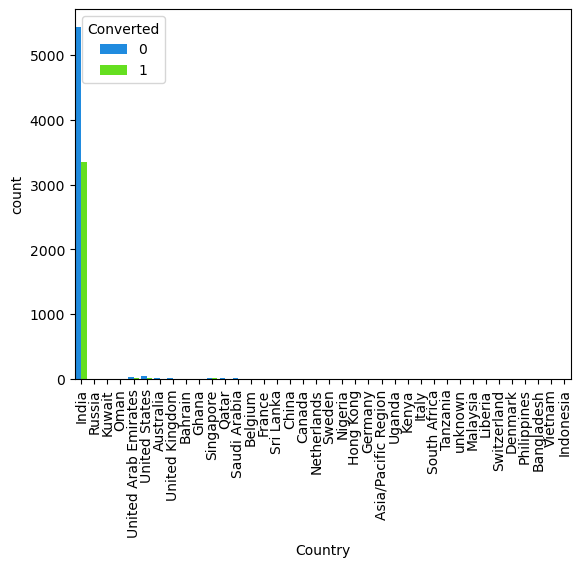

In [58]:
cntplt("Country")

### Inference:
Majority of the leads are from India.

11) Specialization

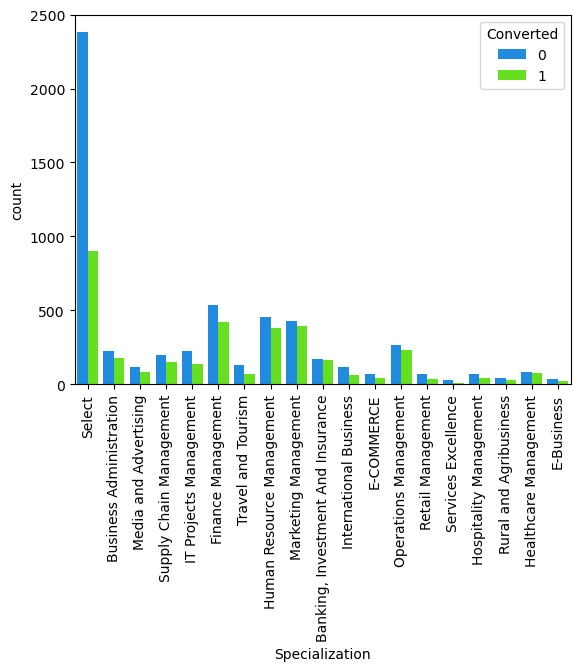

In [59]:
cntplt("Specialization")

### Inference
 - Customers having job experience in certain Industry Domains have shown considerable conversion rates.


P.S : Earlier we have termed the missing values under specialization as Select, insense the Customers have not selected this option while filling the form.

12) What is your current occupation

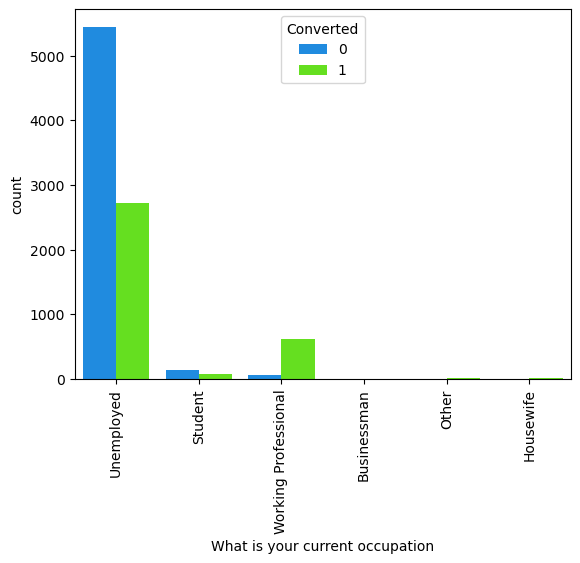

In [60]:
cntplt("What is your current occupation")

### Inference¶
- Working Professionals show high rate of conversion.

- There are many Unemployed customers who showed interest in the course but couldnt actually take up the courses, showing low conversion rate.

We can focus on increasing the  Working Professional leads by reaching out to them through different channels as they show good conversion rate and also focus should be made on increasing the conversion rate of Unemployed leads.

13) Search

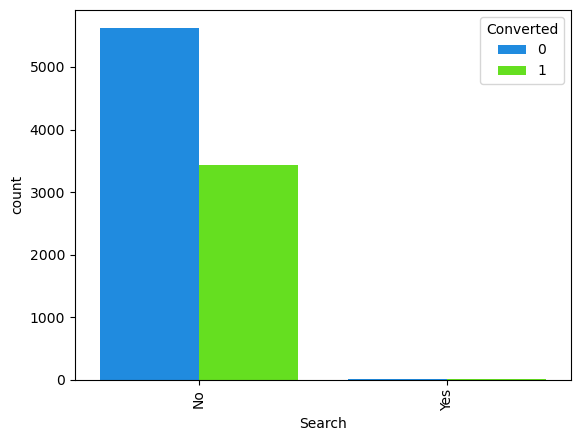

In [61]:
cntplt("Search")

### Inference:
'No' is dominating the "Search" parameter. No Inference can be drawn with this parameter.

14) Magazine

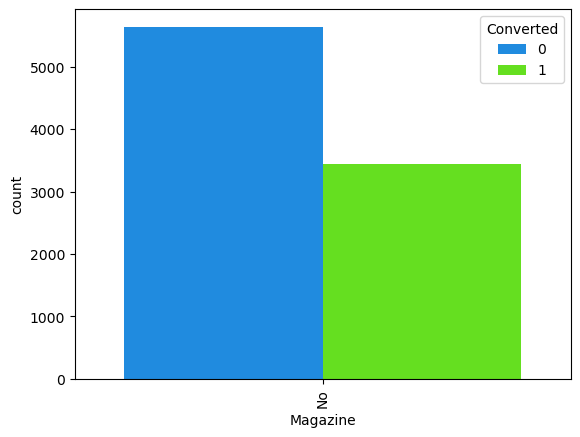

In [62]:
cntplt("Magazine")

### Inference
No Inference can be drawn with this parameter as the only response is No here.

15) Newspaper Article

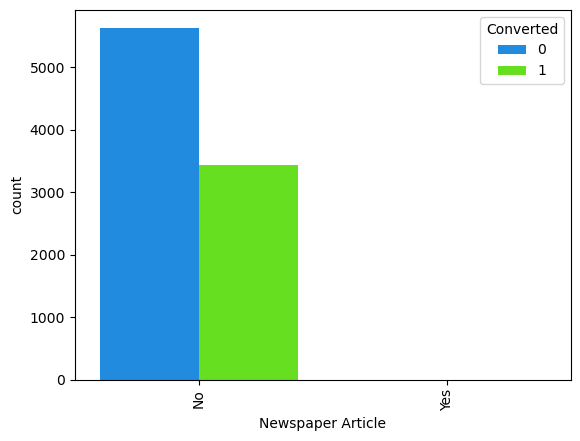

In [63]:
cntplt("Newspaper Article")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

16) X Education Forums

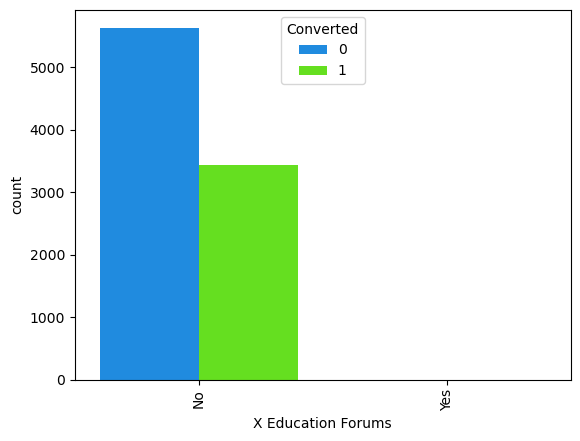

In [64]:
cntplt("X Education Forums")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

17) Newspaper

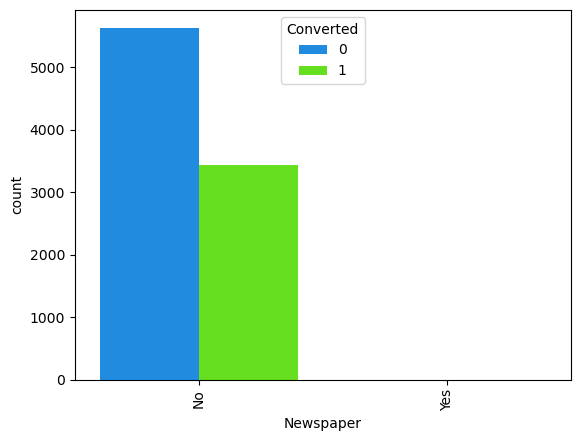

In [65]:
cntplt("Newspaper")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

18) Digital Advertisement

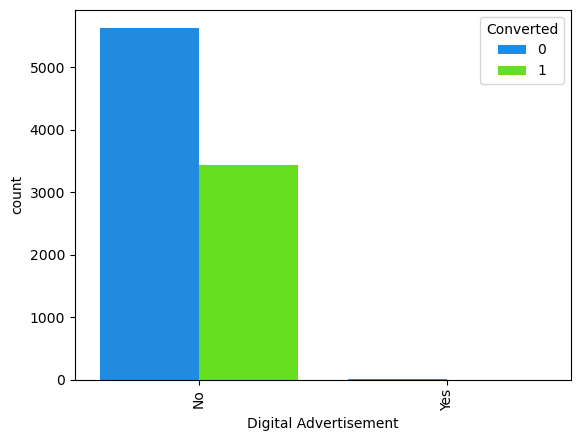

In [66]:
cntplt("Digital Advertisement")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

19) Through Recommendations

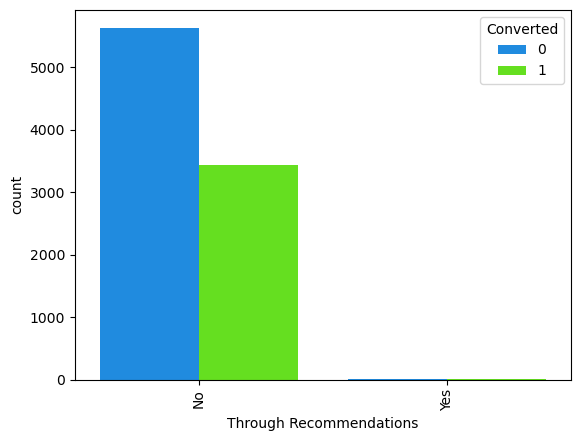

In [67]:
cntplt("Through Recommendations")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

20) Receive More Updates About Our Courses

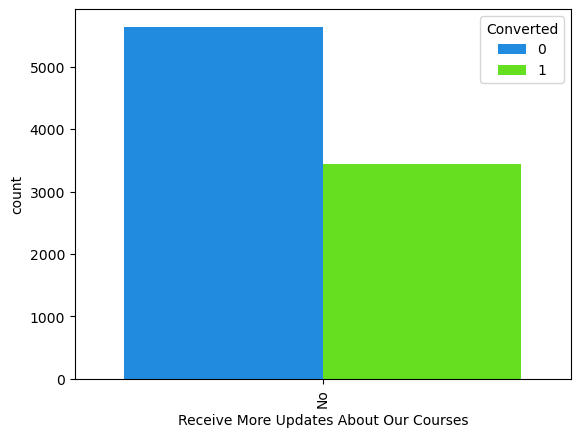

In [68]:
cntplt("Receive More Updates About Our Courses")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

22) Update me on Supply Chain Content

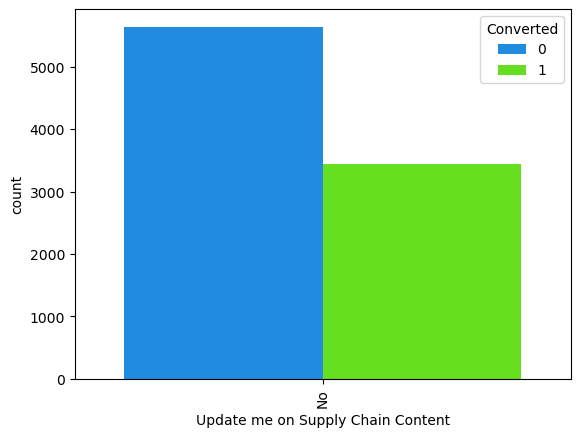

In [69]:
cntplt("Update me on Supply Chain Content")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

23) Get updates on DM Content

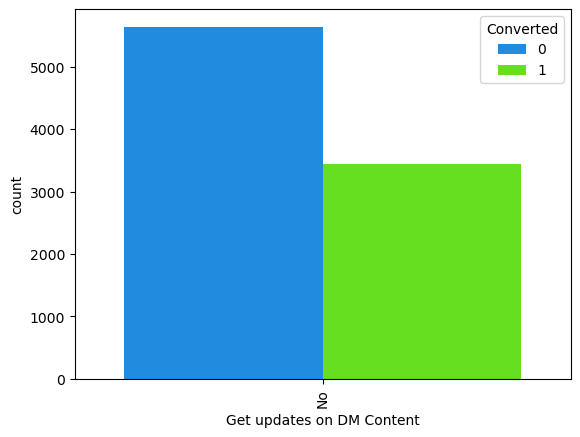

In [70]:
cntplt("Get updates on DM Content")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

25) I agree to pay the amount through cheque

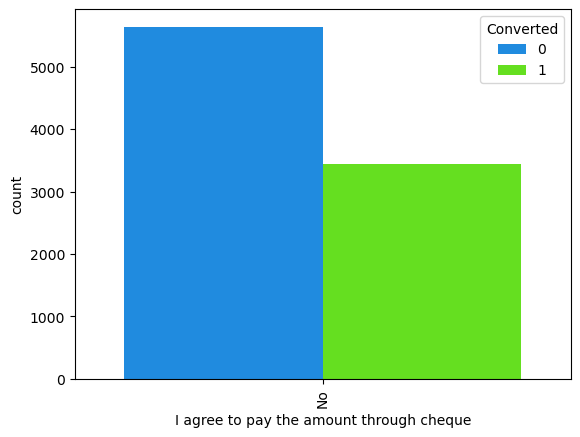

In [71]:
cntplt("I agree to pay the amount through cheque")

### Inference
No Inference can be drawn with this parameter as majority of the response is No here.

26) A free copy of Mastering The Interview

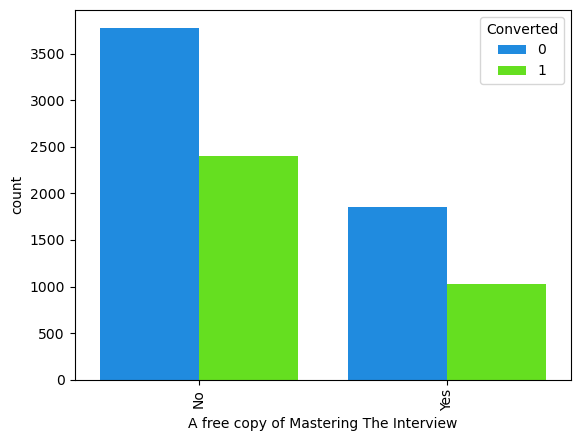

In [72]:
cntplt("A free copy of Mastering The Interview")

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

27) Last Notable Activity

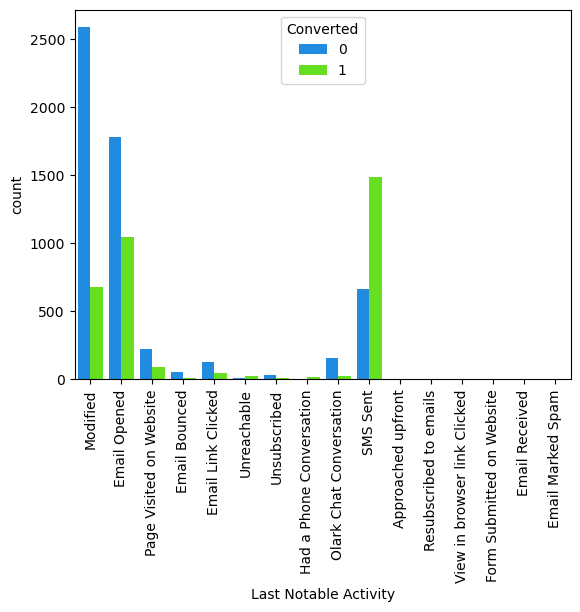

In [73]:
cntplt("Last Notable Activity")

In [74]:
# Clubbing All the categories which doesn't have much values as 'Others'

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Approached upfront' , 'Resubscribed to emails', 'View in browser link Clicked',
                                                                      'Form Submitted on Website' ,'Email Received', 'Email Marked Spam' ], 'Others')

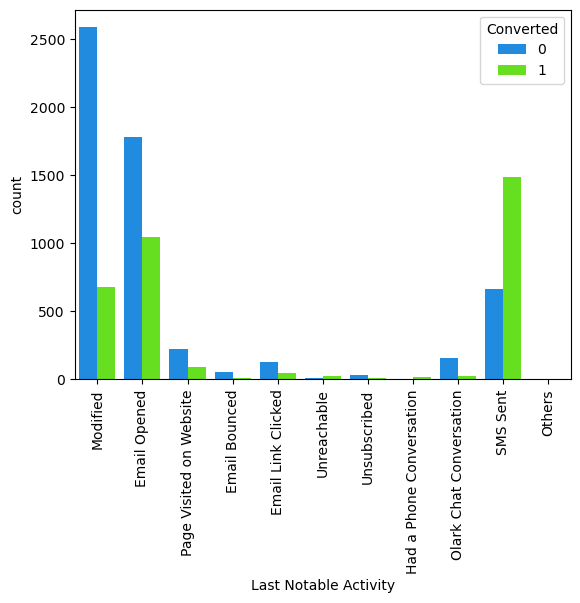

In [75]:
cntplt("Last Notable Activity")

### Inference:

- SMS sent shows high conversion rates.
- Modified and Email Opened have high leads count

  We should focus on increasing the conversion rate of those having 'Last Notable Activity' as Modified and Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as 'SMS sent'.

#### Summary of Inferences :


- To improvise the lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

- To improve overall lead conversion rate, focus should be on improving lead converion of 'olark chat', 'organic search', 'direct traffic', and 'google' leads and generate more leads from 'reference' and 'welingak website'.

- Focus can be made on enhancing the customer experience on website,in turn increasing the time customer spends on the websites, resulting in increasing the conversion rates.

- We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent.

- We can focus on increasing the  Working Professional leads by reaching out to them through different channels as they show good conversion rate and also focus should be made on increasing the conversion rate of Unemployed leads

- We should focus on increasing the conversion rate of those having 'Last Notable Activity' as Modified and Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as 'SMS sent'.

In [76]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

### Inference from the Univariate Analysis
- We have observed that for many parameters, we could not draw and inferences, hence we will drop those columns to proceed further analysis.
- Also dropping Prospect ID and Lead Number as we dont need it for our analysis.

In [77]:
lead = lead.drop(columns=['Prospect ID', 'Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement',
                   'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Do Not Call'])

In [78]:
lead.shape

(9074, 11)

In [79]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 850.7+ KB


We can find the percentage of rows retained.

In [80]:
# Percentage of rows retained 
(len(lead.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data .

## 6: Data Preparation


Lets create Dummy variables for the categorical features:

So first take a look at which variables are actually categorical variables.

In [81]:
# Check the columns which are of type 'object'
temp = lead.loc[:, lead.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [82]:
# Creating dummy variable separately for the variable 'Specialization' since it has Select as Unknown values
# which is useless so we drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead['Specialization'], prefix='Specialization', dtype=int)



In [83]:
dummy_spl = dummy_spl.drop(columns=['Specialization_Select'])
lead = pd.concat([lead, dummy_spl], axis = 1)


In [84]:
lead = lead.drop(columns=['Specialization'])

In [85]:
# Create dummy variables using the 'get_dummies' command for the rest

dummies = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                                'What is your current occupation',
                               'Last Notable Activity']] , drop_first=True, dtype=int)

In [86]:
# Concatenating the dummies to the lead dataframe

lead = pd.concat([lead, dummies], axis=1)

Dropping the columns for which dummies were created

In [87]:
# Drop the variables for which the dummy variables have been created

lead = lead.drop(columns=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                           'What is your current occupation',
                           'Last Notable Activity'])

In [88]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 7. Splitting the data into train and test set.

In [89]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = lead.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
# Putting target variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

4) Scaling the features

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,-0.284595,-0.160255,-0.179666,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0.295588,2.017593,0.058552,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
# Checking the Lead Conversion rate

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

Data shows 37.86% lead conversion rate.

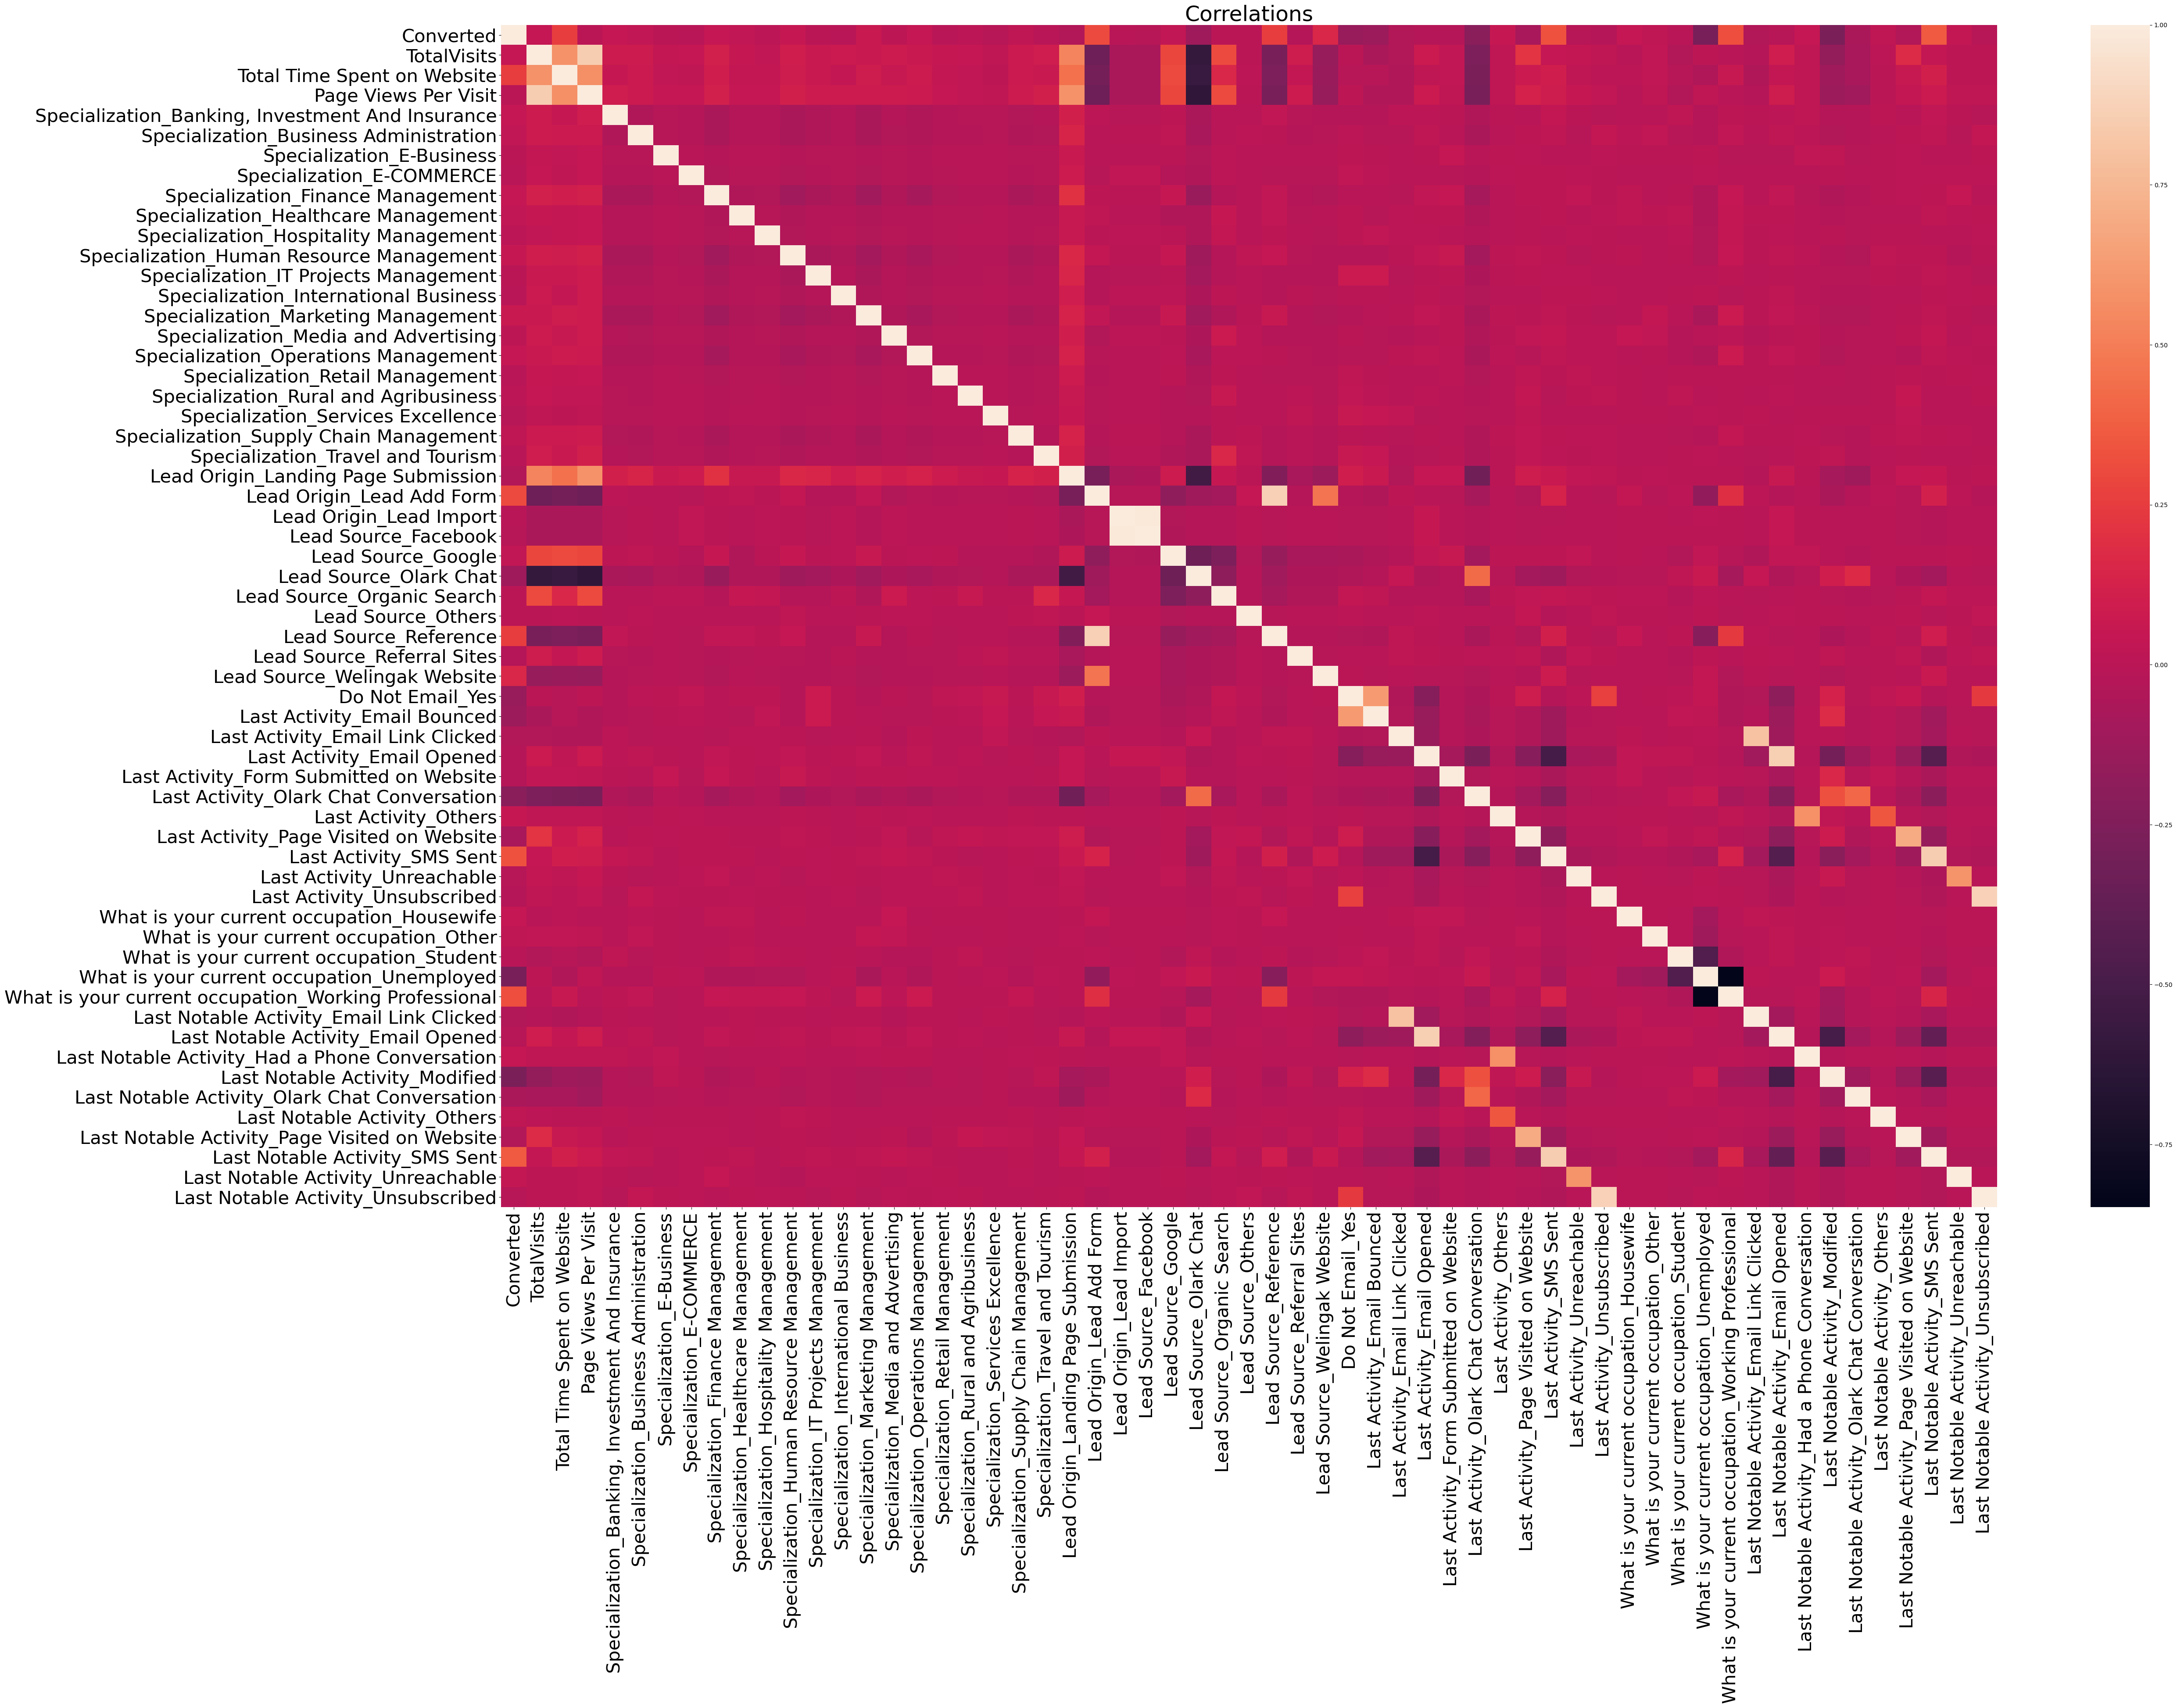

In [94]:
# Correlation in the dataset

# setting the figure size
plt.figure(figsize=(55,35))

# Plotting a heatmap

sns.heatmap(lead.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

In [95]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = lead.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                             0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800686
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.691811
Do Not Email_Yes                       Last Activity_Email Bounced                       0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.594369
Last Activity_Others                   Last Notable Activity_Had a Phone Conversation    0.576457
dtype: float64

In [96]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)

We will now proceed with building our model and based on the p-values and VIFs, we will again check for correlation.

### Feature Selection Using RFE

In [97]:
# Importing 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Importing RFE
from sklearn.feature_selection import RFE


In [98]:
# Executing RFE with 15 variables as output

rfe = RFE(logreg, n_features_to_select= 15)             
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True, False, False, False])

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 12),
 ('Specialization_Healthcare Management', False, 16),
 ('Specialization_Hospitality Management', False, 23),
 ('Specialization_Human Resource Management', False, 13),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_International Business', False, 20),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising', False, 22),
 ('Specialization_Operations Management', False, 14),
 ('Specialization_Retail Management', False, 21),
 ('Specialization_Rural and Agribusiness', False, 18),
 ('Specialization_Services Excellence', False, 24),
 ('Specialization_Supply Chain Managemen

In [101]:
# Viewing columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [102]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creating a function for VIF 
def CheckVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

The Variance Inflation Factor (VIF) is used to check for multicollinearity in the independent variables of a logistic regression model. 

VIF < 5 means the variable has low multicollinearity.

Since multicollinearity can make regression coefficients sensitive to small changes in the data, which can undermine the model's reliability, we tend to drop the variables which have VIF>5.

# 7: Model Building

Assessing the model with StatsModels

Model-1

In [103]:
import statsmodels.api as sm

In [104]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# fitting the model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()

# Print a summary of the logistic regression model obtained
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.6
Date:                Tue, 22 Oct 2024   Deviance:                       5419.3
Time:                        10:59:47   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3811
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2119      0.551      0.385      0.701      -0.868       1.292
Total Time Spent on Website                              1.1350      0.040     28.551      0.000       1.057       1.213
Lead Origin_Lead Add Form                                2.2886      0.919      2.489      0.013       0.487       4.091
Lead Origin_Lead Import                                  1.5145      0.462      3.276      0.001       0.608       2.421
Lead Source_Olark Chat                                   1.3221      0.103     12.854      0.000       1.121       1.524
Lead Source_Reference                                    1.7068      0.944      1.808      0.071      -0.143       3.557
Lead Source_Welingak Website                             3.7016      1.169      3.166      0.002       1.410       5.993
Do Not Email_Yes                                        -1.8281      0.182    -10.037      0.000      -2.185      -1.471
Last Activity_Olark Chat Conversation                   -1.4132      0.161     -8.803      0.000      -1.728      -1.099
Last Activity_Others                                     1.4610      0.528      2.767      0.006       0.426       2.496
Last Activity_SMS Sent                                   1.3669      0.074     18.587      0.000       1.223       1.511
Last Activity_Unsubscribed                               1.6140      0.469      3.444      0.001       0.695       2.533
What is your current occupation_Student                 -1.2229      0.592     -2.066      0.039      -2.383      -0.063
What is your current occupation_Unemployed              -1.7068      0.552     -3.091      0.002      -2.789      -0.624
What is your current occupation_Working Professional     1.0731      0.580      1.851      0.064      -0.063       2.209
Last Notable Activity_Had a Phone Conversation           2.2581      1.215      1.859      0.063      -0.123       4.639
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Working Professional' is very high(0.095), we can drop this column.

Note: A p-value of less than 0.05 is generally considered statistically significant in logistic regression. Hence we will be dropping the features with a P-Value higher than 0.05.

In [105]:
# Dropping the column 'What is your current occupation_Working Professional'
drop_col = rfe_col.drop('What is your current occupation_Working Professional')

Model-2

In [106]:
X_train_sm = sm.add_constant(X_train[drop_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.2
Date:                Tue, 22 Oct 2024   Deviance:                       5422.4
Time:                        10:59:47   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.1956      0.172      6.944      0.000       0.858       1.533
Total Time Spent on Website                        1.1343      0.040     28.540      0.000       1.056       1.212
Lead Origin_Lead Add Form                          2.2882      0.919      2.489      0.013       0.486       4.090
Lead Origin_Lead Import                            1.5190      0.461      3.293      0.001       0.615       2.423
Lead Source_Olark Chat                             1.3226      0.103     12.861      0.000       1.121       1.524
Lead Source_Reference                              1.7058      0.944      1.807      0.071      -0.144       3.556
Lead Source_Welingak Website                       3.7013      1.169      3.165      0.002       1.409       5.993
Do Not Email_Yes                                  -1.8278      0.182    -10.027      0.000      -2.185      -1.471
Last Activity_Olark Chat Conversation             -1.4148      0.161     -8.805      0.000      -1.730      -1.100
Last Activity_Others                               1.4660      0.527      2.781      0.005       0.433       2.499
Last Activity_SMS Sent                             1.3701      0.073     18.649      0.000       1.226       1.514
Last Activity_Unsubscribed                         1.6189      0.468      3.460      0.001       0.702       2.536
What is your current occupation_Student           -2.2070      0.276     -7.985      0.000      -2.749      -1.665
What is your current occupation_Unemployed        -2.6916      0.175    -15.403      0.000      -3.034      -2.349
Last Notable Activity_Had a Phone Conversation     2.2544      1.214      1.857      0.063      -0.125       4.634
==================================================================================================================
"""

Since Pvalue of 'Lead Source_Reference' is high(0.076), we can drop this column.

In [107]:
drop_col = drop_col.drop('Lead Source_Reference')

Model-3

In [108]:
X_train_sm = sm.add_constant(X_train[drop_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.6
Date:                Tue, 22 Oct 2024   Deviance:                       5425.1
Time:                        10:59:47   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3805
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.1974      0.172      6.958      0.000       0.860       1.535
Total Time Spent on Website                        1.1336      0.040     28.523      0.000       1.056       1.212
Lead Origin_Lead Add Form                          3.9274      0.221     17.786      0.000       3.495       4.360
Lead Origin_Lead Import                            1.5181      0.461      3.291      0.001       0.614       2.422
Lead Source_Olark Chat                             1.3201      0.103     12.831      0.000       1.118       1.522
Lead Source_Welingak Website                       2.0603      0.753      2.734      0.006       0.584       3.537
Do Not Email_Yes                                  -1.8240      0.182    -10.025      0.000      -2.181      -1.467
Last Activity_Olark Chat Conversation             -1.4133      0.161     -8.797      0.000      -1.728      -1.098
Last Activity_Others                               1.4694      0.527      2.789      0.005       0.437       2.502
Last Activity_SMS Sent                             1.3703      0.073     18.658      0.000       1.226       1.514
Last Activity_Unsubscribed                         1.6158      0.468      3.455      0.001       0.699       2.533
What is your current occupation_Student           -2.2059      0.276     -7.989      0.000      -2.747      -1.665
What is your current occupation_Unemployed        -2.6932      0.175    -15.421      0.000      -3.036      -2.351
Last Notable Activity_Had a Phone Conversation     2.2507      1.214      1.854      0.064      -0.129       4.630
==================================================================================================================
"""

Now we see from the statistical representation that all the variables are now statistically significant. Also to be more sure, we check the multicollinearity  by using VIF.

In [109]:
CheckVIF(X_train[drop_col])

,Features,VIF
11,What is your current occupation_Unemployed,1.89
3,Lead Source_Olark Chat,1.72
7,Last Activity_Others,1.55
12,Last Notable Activity_Had a Phone Conversation,1.55
8,Last Activity_SMS Sent,1.50
1,Lead Origin_Lead Add Form,1.46
6,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.27
5,Do Not Email_Yes,1.17


From the VIF, we can see that the VIF is values for every column is now below 3 and this means that the model is a stable one and variables are independent to each other, hence we can consider Model 6 as our final model.

Making Prediction on the Train set

In [110]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.157423
1012    0.224646
9226    0.546671
4750    0.850347
7987    0.896750
1281    0.713755
2880    0.076215
4971    0.884185
7536    0.833518
1248    0.878753
dtype: float64

In [111]:
# Reshaping the conversions into a Numpy array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15742321, 0.22464588, 0.54667087, 0.8503469 , 0.89674971,
       0.71375474, 0.07621498, 0.88418456, 0.83351816, 0.87875265])

### Creating a dataframe with the actual Converted flag and the predicted probabilities of Conversion

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.157423,3009
1,0,0.224646,1012
2,0,0.546671,9226
3,1,0.850347,4750
4,1,0.896750,7987


Creating new column 'predicted' with 1 if Conversion Probability > 0.5 else 0

P.S: Here we are choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.157423,3009,0
1,0,0.224646,1012,0
2,0,0.546671,9226,1
3,1,0.850347,4750,1
4,1,0.896750,7987,1


### Creating the Confusion matrix

In [114]:
# Importing Library to create the confusion matrix
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3427  478]
 [ 736 1710]]


Since, the number of Conversions that are the top most priority, we will calculate the Sensitivity of the model

In [115]:
TP = confusion[1,1] # true positive (1718)
TN = confusion[0,0] # true negatives (3466)
FP = confusion[0,1] # false positives (439)
FN = confusion[1,0] # false negatives (728)

In [116]:
# Checking the Sensitivity
TP / float(TP+FN)

0.6991005723630417

In [117]:
# Checking the Specificity
TN / float(TN+FP)

0.8775928297055058

In [118]:
# Checking the false postive rate - predicting converted lead when the lead actually was not converted
FP/ float(TN+FP)

0.12240717029449424

In [119]:
# Checking the positive predictive value 
TP / float(TP+FP)

0.7815356489945156

In [120]:
# Checking the Negative predictive value
TN / float(TN+ FN)

0.8232044198895028

In [121]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8088490001574555

We found out that our specificity was good (88.98%) but our sensitivity was only 69.95%. 
Hence, this needed to be taken care of.

    
We have got sensitivity of 69.95% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. 

We can try to vary the probability cutoff and check if the sensitivity improves.

Applying ROC curve technique to find out the optimum cutoff for the conversion probability

## Plotting the ROC Curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

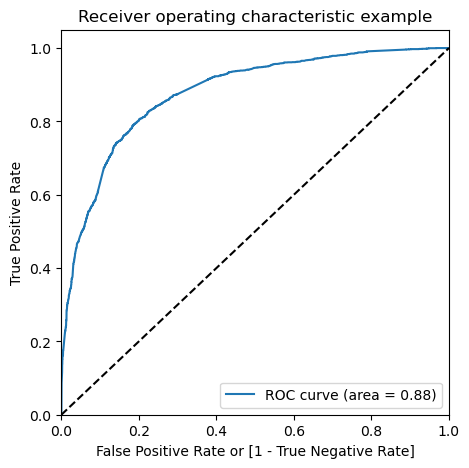

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

After plotting the ROC curve, we see that the area under the curve is 0.88 which is high and this is indicates that the model that we have built is a good model.

## Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.
Since we choose an arbitrary cut-off value of 0.5 earlier, we need to determine the best cut-off value and the below section deals with that

In [125]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157423,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.224646,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.546671,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.850347,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.896750,7987,1,1,1,1,1,1,1,1,1,1,0


For different probability, we calculate the Accuracy, Sensitivity and Specificity for various probability cutoffs.

In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.597071     0.966885     0.365429
0.2          0.2  0.729177     0.920687     0.609219
0.3          0.3  0.791371     0.834015     0.764661
0.4          0.4  0.809479     0.759608     0.840717
0.5          0.5  0.808849     0.699101     0.877593
0.6          0.6  0.785860     0.570728     0.920615
0.7          0.7  0.774524     0.501226     0.945711
0.8          0.8  0.754369     0.412101     0.968758
0.9          0.9  0.704771     0.253066     0.987708


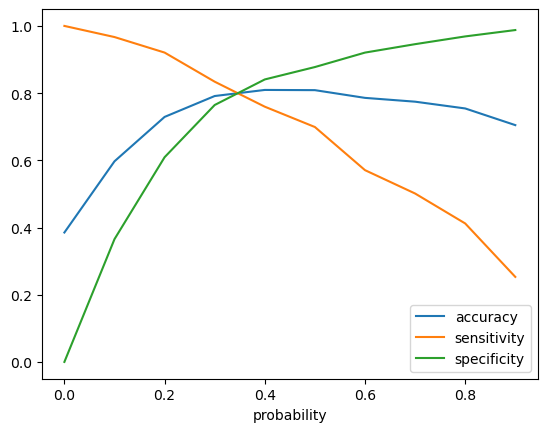

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

We see that the point of intersection is somewhere between 0.3 and 0.4. Hence, we consider the cutoff as 0.38 and try to predict the final probability of the train set.

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157423,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.224646,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.546671,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.850347,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.896750,7987,1,1,1,1,1,1,1,1,1,1,0,1


### Assigning Lead Score to the Training data

In [129]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.157423,3009,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.224646,1012,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.546671,9226,1,1,1,1,1,1,1,0,0,0,0,1,55
3,1,0.850347,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.896750,7987,1,1,1,1,1,1,1,1,1,1,0,1,90


## 8: Model Evaluation

In [130]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8055424342623209

In [131]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3427,  478],
       [ 736, 1710]], dtype=int64)

In [132]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6991005723630417

In [133]:
# Checking the specificity
TN / float(TN+FP)

0.8775928297055058

In [134]:
# Checking the false postive rate - predicting converted lead when the lead was actually not have converted
FP/ float(TN+FP)

0.12240717029449424

In [135]:
# Checking the Positive predictive value 
TP / float(TP+FP)

0.7815356489945156

In [136]:
# Checking the Negative predictive value
TN / float(TN+ FN)

0.8232044198895028

### Precision and Recall

- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [137]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3427,  478],
       [ 736, 1710]], dtype=int64)

In [138]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7815356489945156


In [139]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6991005723630417


### Using sklearn utilities for the same

In [140]:
from sklearn.metrics import precision_score, recall_score

In [141]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7815356489945156


In [142]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6991005723630417


### Precision and recall tradeoff

In [143]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

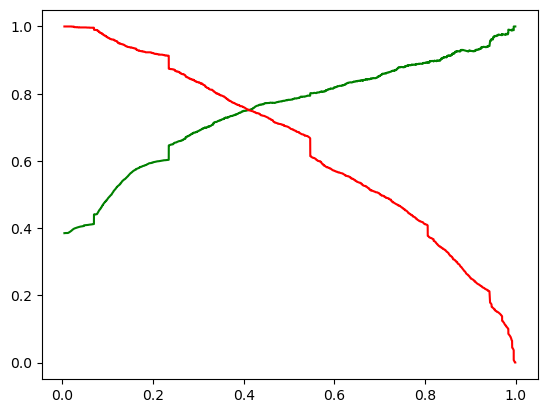

In [145]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above graph shows the trade-off between the Precision and Recall .
The optimal cutoff point is where the values of precision and recall will be equal
The optimal value shows around 0.38.
So, when precision and recall are both around 0.38, the two curves are intersecting.

### Making predictions on the test set

Scaling the test data

In [146]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [147]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[drop_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation
3271,-0.600595,0,0,0,0,0,0,0,0,0,0,1,0
1490,1.887326,0,0,0,0,0,0,0,0,0,0,0,0
7936,-0.752879,0,0,0,0,0,0,0,0,0,0,1,0
4216,-0.888650,1,0,0,0,0,0,0,0,0,1,0,0
3830,-0.587751,0,0,0,0,0,0,0,0,0,0,1,0


In [148]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.101863
1490    0.965672
7936    0.087119
4216    0.871180
3830    0.103202
1800    0.586150
6507    0.296377
4821    0.252606
4223    0.942376
4714    0.546671
dtype: float64

In [149]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head
y_pred_1.head()

,0
3271,0.101863
1490,0.965672
7936,0.087119
4216,0.871180
3830,0.103202


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [152]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [153]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.101863
1,1,1490,0.965672
2,0,7936,0.087119
3,1,4216,0.871180
4,0,3830,0.103202


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [157]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [158]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.101863
1,1490,1,0.965672
2,7936,0,0.087119
3,4216,1,0.871180
4,3830,0,0.103202


In [159]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [160]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.101863,0
1,1490,1,0.965672,1
2,7936,0,0.087119,0
3,4216,1,0.871180,1
4,3830,0,0.103202,0


In [161]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8035255233198678


In [162]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1436,  298],
       [ 237,  752]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7603640040444893


In [165]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8281430219146482


In [166]:
print("Precision :",precision_score(y_pred_final.Converted , y_pred_final.final_predicted))

Precision : 0.7161904761904762


In [167]:
print("Recall :",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall : 0.7603640040444893


### Assigning Lead Score to the Testing data

In [168]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.101863,0,10
1,1490,1,0.965672,1,97
2,7936,0,0.087119,0,9
3,4216,1,0.871180,1,87
4,3830,0,0.103202,0,10


### Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.35 %
Sensitivity : 76.03 %
Specificity : 82.81 %
Precision : 71.61 % 
Recall: 77.04%

### Results: 

1) Comparing the values obtained for Train & Test:

2. Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [169]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.965672,1,97
3,4216,1,0.871180,1,87
8,4223,1,0.942376,1,94
21,2461,1,0.992269,1,99
23,5822,1,0.995880,1,100
...,...,...,...,...,...
2694,1566,1,0.941096,1,94
2699,6461,1,0.870546,1,87
2703,5741,1,0.898660,1,90
2715,6299,1,0.858621,1,86


So there are 343 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [170]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 4543,
       4830, 3542, 7674, 8596, 4003, 6947, 4807,  446,  789, 8372, 5805,
       3758, 1561,  737, 6423, 8286, 7174, 4461, 1436, 7552, 3932, 1475,
       5785, 1867, 8189, 2860, 7253, 4297, 5490, 1995, 4498, 5797, 8687,
       7653, 2018,  453, 3976, 5769, 2124, 8862, 1663, 3288, 8959, 7521,
       8282, 6070, 8213, 9063, 5292, 6913, 1481, 3265, 3285, 2460, 3384,
       8106,  373, 7417, 4179, 8568, 7268, 6784, 6754, 2960, 7753, 3983,
        802, 8745, 4717, 8509, 6094, 4992, 7036, 2680, 7065,  112, 7175,
       1675, 6999, 5826, 6499, 2481, 3439, 4612, 7129, 4793, 2495, 3739,
        822, 2600, 1030, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,
        720, 7489,  941, 2961, 1542, 5656, 8205, 6332, 8461, 5135, 2427,
        174, 2674, 8065, 1568, 8597, 6484, 4865, 4708, 7975, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 5042, 4081, 6684, 1927, 5824,
         64, 2650, 5808, 8577, 4578, 5365, 4803, 14

3. Finding out the Important Features from our final mode

In [171]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                         3.927382
Last Notable Activity_Had a Phone Conversation    2.250670
Lead Source_Welingak Website                      2.060309
Last Activity_Unsubscribed                        1.615820
Lead Origin_Lead Import                           1.518147
Last Activity_Others                              1.469376
Last Activity_SMS Sent                            1.370326
Lead Source_Olark Chat                            1.320144
const                                             1.197381
Total Time Spent on Website                       1.133606
Last Activity_Olark Chat Conversation            -1.413250
Do Not Email_Yes                                 -1.823974
What is your current occupation_Student          -2.205950
What is your current occupation_Unemployed       -2.693243
dtype: float64

Hence, the final model is as below:

Converted = 1.471697+ Lead Origin_Lead Add Form*3.908569+Last Activity_Others*2.281693+Lead Source_Welingak Website*2.012467+
            Lead Origin_Lead Import*1.477128+ Last Activity_Unsubscribed*1.435453+Last Activity_SMS Sent*1.294636+
            Lead Source_Olark Chat*1.238324+ Total Time Spent on Website*1.127928 -Last Notable Activity_Modified*0.896926-
            Last Activity_Olark Chat Conversation*0.970622- Do Not Email_Yes*1.704308 - What is your current occupation_Student*2.272949- 
            What is your current occupation_Unemployed*2.686516

### As Business requested : your model should be able to adjust to if the company's requirement changes in the future,

Lets build a reusable code block for X Education

In [172]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [173]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

### Recommendations:


- The company **should make calls and nurture** the leads coming from **Lead Origin - Lead Add Form and Lead Import** as these are more likely to get converted.
- The company **should make calls and nurture** the leads with **Last Activity SMS Sent and Others like customers who Had a Phone Conversation, View in browser link, Visited Booth in Tradeshow, Approached upfront,Resubscribed to emails,Email Received** as these are more likely to get converted.
- The company **should make calls and nurture** the leads coming from **Lead Source - Welingak Website and Olark Chat** , as these are more likely to get converted.
- The company **should make calls and nurture** the leads who spent **more time on the websites** , as these are more likely to get converted.
  





- The company **should not make calls** to the leads whose **last  Notable activity was Modified**, as they are not likely to get converted.
- The company **should not make calls** to the leads whose **last activity was Olark Chat Conversation**, as they are not likely to get converted.
- The company **should not make calls** to the leads who **opted out of Emails**, as they are not likely to get converted.
- The company **should not make calls** to the leads who are **"Students" or "Unemployed"**, as they are not likely to get converted.


### Conclusion:
The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.38 i.e. any lead with greater than 0.38 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.38 or less probability of converting is predicted as Cold Lead (customer will not convert)

Our final Logistic Regression Model is built with 13 features.

Features used in final model are:
" What is your current occupation_Unemployed , Last Notable Activity_Modified, Lead Source_Olark Chat, Last Activity_Olark Chat Conversation, Last Activity_SMS Sent, Lead Origin_Lead Add Form, Lead Source_Welingak Website, Total Time Spent on Website, Do Not Email_Yes, Last Activity_Unsubscribed, What is your current occupation_Student, Lead Origin_Lead Import, Last Activity_Others"	

The top three categorical/dummy variables in the final model are ‘Lead Origin_Lead Add Form’, ‘Last Activity_Others’, ‘Lead Source_Welingak Website’ with respect to the absolute value of their coefficient factors.


‘Lead Origin_Lead Add Form’ is obtained by Dummy Encoding of original categorical variable 'Lead Origin'
‘Last Activity_Others’, is obtained by Dummy Encoding of original categorical variable 'Last Activity'
‘Lead Source_Welingak Website’ is obtained by Dummy Encoding of original categorical variable 'Lead Source'


Lead Origin_Lead Add Form having Coefficient factor =  3.908569
Last Activity_Others having Coefficient factor =  2.281693
Lead Source_Welingak Website having Coefficient factor =  2.012467


The final model has Sensitivity of 69.92%, this means the model is able to predict 69.92% customers out of all the converted customers, (Positive conversion) correctly.

The final model has Precision of 78.15%, this means 78.15% of predicted hot leads are True Hot Leads.

We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. 
Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

### SUBJECTIVE QUESTION WHICH NEED CODE EXECUTION

### Subjective Question #3
3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.



In [174]:
build_model_cutoff(X_train[drop_col], y_train, X_test[drop_col], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.157423                  1          16
1         1012          0             0.224646                  1          22
2         9226          0             0.546671                  1          55
3         4750          1             0.850347                  1          85
4         7987          1             0.896750                  1          90
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.101863                  1          10
1         1490          1             0.965672                  1          97
2         7936          0             0.087119                  0           9
3         4216          1             0.871180                  1          87
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.101863,1,10
1,1490,1,0.965672,1,97
2,7936,0,0.087119,0,9
3,4216,1,0.871180,1,87
4,3830,0,0.103202,1,10
...,...,...,...,...,...
2718,850,0,0.314532,1,31
2719,2879,0,0.217859,1,22
2720,6501,1,0.893882,1,89
2721,7155,0,0.192772,1,19


Solution : The Business can follow the above strategy during the 2 months period when they hire 10 interns. Now they have 2723 customers with the convert to predict flag helping them to target the customers to call and nurture to convert. 

When “convert_predict” flag is set to 1 – means this customer is a hot lead.

This strategy will pull up more customers as target customers as we have lowered the cut-off value to 0.1 this will bring more customers under the Hot Leads bucket..

To help business look at these numbers we have built a reusable code block in the python file wherin the business can adjust the cut-off values as above.


### Subjective Question #4
4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [175]:
build_model_cutoff(X_train[drop_col], y_train, X_test[drop_col], y_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.157423                  0          16
1         1012          0             0.224646                  0          22
2         9226          0             0.546671                  0          55
3         4750          1             0.850347                  0          85
4         7987          1             0.896750                  0          90
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.101863                  0          10
1         1490          1             0.965672                  1          97
2         7936          0             0.087119                  0           9
3         4216          1             0.871180                  0          87
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.101863,0,10
1,1490,1,0.965672,1,97
2,7936,0,0.087119,0,9
3,4216,1,0.871180,0,87
4,3830,0,0.103202,0,10
...,...,...,...,...,...
2718,850,0,0.314532,0,31
2719,2879,0,0.217859,0,22
2720,6501,1,0.893882,0,89
2721,7155,0,0.192772,0,19


Solution: 
The Business can follow the above strategy during the times when the company reaches its target for a quarter before the deadline. 
As the company wants the sales team to focus on some new work as well, we have set the cut-off value higher which gives us leads on top most category, with convert to predict flag helping them to target the customers to call and nurture to convert.

When “convert_predicted” flag is set to 1 – means this customer is a hot lead.

This strategy will pull up less customers as target customers as we have increased the cut-off value. This will have less number of customers under the Hot Leads bucket.

To help business look at these numbers we have built a reusable code block in the python file wherein the business can adjust the cut-off values as above.
